# Creating a test set 
    - why we should put aside a part of the data
    - methods to do it
 

In [27]:
import pandas as pd

housing = pd.read_csv(r"C:\Users\georg\Desktop\end_end\datasets\housing\housing.csv")  # we just read it directly from the
# adress, clean and simple 

###  It may sound strange to voluntarily set aside part of the data at this stage.This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. 
### This is called data snooping bias.


In [28]:
import numpy as np 

#### <font color=green> 1. Creating a test set with randomly picked instances of the data</font>
##### Advantages from a beginner point of view:
        - easy to do
        - works in most beginner and small data set cases
##### Disadvantages from a beginner point of view:
        - over time u get to see the whole data set ( because in generates a different test set each time )
        - pretty advanced at first glance  - intermediate + 
        - we have to use Scikit_Learn functions -  which can be pretty complicated first time around

In [29]:
# we define our own function like in the book:
def split_train_test_random(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# we shall disect this function so that u understand it better

In [30]:
random1 = np.random.permutation(5)
random2 = np.random.permutation(10)
print(random1)
print(random2)
# as u can see numpy.random.permutation shuffles some indexes of different lenghts  - it outputs a list/array

[0 1 3 4 2]
[1 2 8 4 6 0 5 9 3 7]


In [31]:
size= int(5 * 0.2)   # a smaller version of test_set_size = int(len(data) * test_ratio)  this is where the percent is set
# !!! must be integer to use in slicing 

test_ind = random2[:size]   # test_indices = shuffled_indices[:test_set_size]  slices the array/list
train_ind = random2[size:]  # train_indices = shuffled_indices[test_set_size:]  slices the array/list 

print(test_ind)
print(train_ind)

[1]
[2 8 4 6 0 5 9 3 7]


In [32]:
housing.iloc[train_ind]  # returns the data at does sliced indeces in housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [33]:
# or simply use the function build in Sklearn
from sklearn.model_selection import train_test_split
housing_train,housing_test = train_test_split(housing,test_size = 0.2,random_state=1)
# test_size -If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
# random_state -Controls the shuffling applied to the data before applying the split. 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [34]:
len(housing_test), len(housing_train)  # it splitted the data 80% train set and 20% test set

(4128, 16512)

#### <font color=green>2. Creating a test set using an instance identifier</font>
#### 

In [35]:
from zlib import crc32

In [36]:
x = np.int64(4478734895342)  #  Integer (-9223372036854775808 to 9223372036854775807)
print(x)

4478734895342


##### compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower or equal to 20% of the maximum hash value.

In [37]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
# 0xFFFFFFFF is a large number; it's the hexadecimal representation of 2 to the power 32 -1   dont bother with it

##### Unfortunately, the housing dataset does not have an identifier column. The simplest solution is to add and the n use the row index as the ID:

In [38]:
housing_with_id = housing.reset_index()  # resetting the index adds an "index" column
housing_with_id.head(1)  

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [39]:
housing_with_id["index"][0:5], type(housing_with_id["index"][0:5])  # it returns the values of the index column 

(0    0
 1    1
 2    2
 3    3
 4    4
 Name: index, dtype: int64,
 pandas.core.series.Series)

In [40]:
y = housing_with_id["index"][0:5]
y.apply(lambda id_:test_set_check(id_,0.2)) 
# pandas.Series.apply - invoke function on values of Series.
# lambda function here it uses the index values as variable id_ and inputs it in another function test_set_check to return
# boolean values

0    False
1    False
2     True
3    False
4    False
Name: index, dtype: bool

In [41]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [42]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
train_set
# we get our train and test sets based of an identifier 
# Problem with using the row index as identifier is you need to make sure that new data gets appended to the end of the dataset
# and no row ever gets deleted.

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [43]:
# If this is not possible, then you can try to use the most stable features to build a unique identifier.
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [44]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


#### <font color=green>2. Creating a test set using stratified sampling - this can be a little confusing but it is important to try to understand</font>

####  So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

##### <font color=red>Random sampling like in the first 2 methods are gone return sammple that are biased, meaning the percent of instances from each categories u have in an attribute will not be reprezentative of the data</font>
    - INSTANCES - individual data in your data set for a particular attribute
    - ATTRIBUTE - also called features , are one particular collection of instances (longitude for example contains all the instances for each record of longitude in the dataset;

#####  Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices.You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.

<AxesSubplot:>

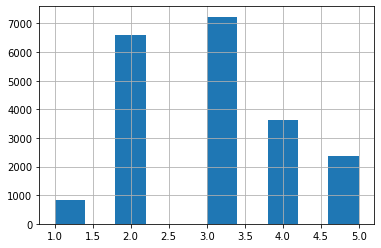

In [45]:
housing["income_category"] =pd.cut(housing["median_income"],bins=[0,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
# labels are the category in which the median_income fall to , we have 5
# bins reprezents the range for each category   -  category 1 is from 0 to 1.5 and so on
housing["income_category"].hist()
# the histogram below show the number of instances for each category 

In [46]:
housing["income_category"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_category, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit  # Provides train/test indices to split data in train/test sets.
# this is a class not a function 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [55]:
split_indices = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# n_splits = Number of re-shuffling & splitting iterations.
# random_state = Controls the randomness of the training and testing indices produced,Pass an int for reproducible output across multiple function calls.

##### So how this works
    - we have created a "list" of indices with the StratifiedShuffleSplit containing indices asociated with a test_set and a train_set
    - now we have to split that list, so we can associate each random index to a label in "income_category"
    - will use the .split function which generate indices to split data into training and test set.
    - it admits to parameters:
        - first :Training data, where n_samples is the number of samples and n_features is the number of features.
        - second : The target variable for supervised learning problems. Stratification is done based on the labels.

In [58]:
for x,y in split_indices.split(housing,housing["income_category"]):
    print(x,y)


[17606 18632 14650 ... 13908 11159 15775] [ 5241 10970 20351 ...  4019 12107  2398]


In [60]:
for train_index, test_index in split_indices.split(housing,housing["income_category"]):
    strat_train_set = housing.loc[train_index]  # we use the first array of indices to create the train set
    strat_test_set = housing.loc[test_index] # we use the labels to create the test set 

In [63]:
strat_test_set["income_category"].value_counts() /len(strat_test_set)
# what this does is give a percent of the proportion of each category/labels in "income_category" in the created test_set
# we can compare it to the proportions in the full data set

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [64]:
housing["income_category"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

In [70]:
housing_train,housing_test = train_test_split(housing,test_size = 0.2,random_state=1)
# we use the random function from first method to split the data again with the "income_category" added

In [71]:
housing_test["income_category"].value_counts() / len(housing_test)

3    0.344234
2    0.326793
4    0.178295
5    0.110950
1    0.039729
Name: income_category, dtype: float64

In [74]:
# we can put them in a a new pandas dataframe togheter for clarity
compare_data = pd.DataFrame({
    "Full data set" : housing["income_category"].value_counts() / len(housing),
    "Stratified" : strat_test_set["income_category"].value_counts() /len(strat_test_set),
    "Random" : housing_test["income_category"].value_counts() / len(housing_test)
}).sort_index()

In [77]:
compare_data

,Full data set,Stratified,Random
1,0.039826,0.039729,0.039729
2,0.318847,0.318798,0.326793
3,0.350581,0.350533,0.344234
4,0.176308,0.176357,0.178295
5,0.114438,0.114583,0.110950


##### <font color=red>As u can see the Stratified test_set is much more reprezentative of the full data set than the randomly created test_set</font>